In [6]:
import numpy as np
import pandas as pd

In [74]:
from datetime import date

In [75]:
oil_url = 'https://andybek.com/pandas-oil'

In [293]:
brent = pd.read_csv(oil_url)

In [294]:
brent.head(10)

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
5,11-Jan-00,23.93
6,12-Jan-00,24.62
7,13-Jan-00,24.90
8,14-Jan-00,25.50
9,17-Jan-00,25.99


In [295]:
dob = pd.Timestamp('2019-01-01')

In [296]:
dob

Timestamp('2019-01-01 00:00:00')

In [297]:
dob - 18

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [298]:
dob - pd.DateOffset(days = 10)

Timestamp('2018-12-22 00:00:00')

In [299]:
dob - pd.DateOffset(days = 4, minutes = 2, nanoseconds =1)

Timestamp('2018-12-27 23:58:00')

In [300]:
pd.DateOffset(year = 1)



<DateOffset: year=1>

In [308]:
brent.set_index('Date', inplace = True)

In [315]:
brent.reset_index(inplace=True)

In [319]:
# brent.drop('index', axis =1, inplace=True)
brent

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
...,...,...
5011,24-Sep-19,64.13
5012,25-Sep-19,62.41
5013,26-Sep-19,62.08
5014,27-Sep-19,62.48


In [334]:
# brent.Date = brent.Date.astype(np.datetime64)

In [324]:
brent = brent.set_index('Date')

In [333]:
brent.head()

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77


In [336]:
brent.reset_index(inplace=True)

In [337]:
brent

,Date,Price
0,2000-01-04 18:00:00,23.95
1,2000-01-05 18:00:00,23.72
2,2000-01-06 18:00:00,23.55
3,2000-01-07 18:00:00,23.35
4,2000-01-10 18:00:00,22.77
...,...,...
5011,2019-09-24 18:00:00,64.13
5012,2019-09-25 18:00:00,62.41
5013,2019-09-26 18:00:00,62.08
5014,2019-09-27 18:00:00,62.48


In [387]:
brent

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [395]:
brent.asfreq('10D', method='ffill').median()

Price    60.99
dtype: float64

In [396]:
brent.resample('M').median()

,Price
Date,
2000-01-31,26.080
2000-02-29,27.610
2000-03-31,27.970
2000-04-30,22.900
2000-05-31,28.260
...,...
2019-05-31,71.785
2019-06-30,63.560
2019-07-31,63.670


In [398]:
brent.head()

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77


In [399]:
(brent.iloc[0] + brent.iloc[1] + brent.iloc[2]) /3

Price    23.74
dtype: float64

In [404]:
brent.rolling(10).mean()

,Price
Date,
2000-01-04 18:00:00,NaN
2000-01-05 18:00:00,NaN
2000-01-06 18:00:00,NaN
2000-01-07 18:00:00,NaN
2000-01-10 18:00:00,NaN
...,...
2019-09-24 18:00:00,64.160
2019-09-25 18:00:00,64.099
2019-09-26 18:00:00,64.231


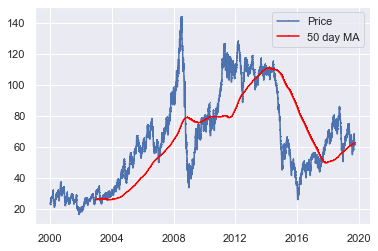

In [407]:
from matplotlib import pyplot as plt
fig ,ax = plt.subplots()
ax.plot(brent, marker=',', label= 'Price')
ax.plot(brent.rolling(750).mean(),color='red', marker=',', label= '50 day MA')

ax.legend()
